<a href="https://colab.research.google.com/github/Ishita1407/WeedDetection/blob/main/Weed_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To Upload an Image


In [ ]:
from google.colab import files

# Upload image from local machine
uploaded = files.upload()

# Get the uploaded image filename
uploaded_filename = list(uploaded.keys())[0]


To Display the Image

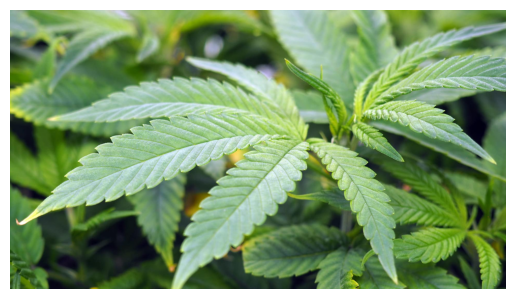

In [ ]:
import cv2
from matplotlib import pyplot as plt

# Read the uploaded image
image = cv2.imread(uploaded_filename)

# Convert BGR to RGB (OpenCV uses BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


Bilateral Filtering (Noise Reduction)

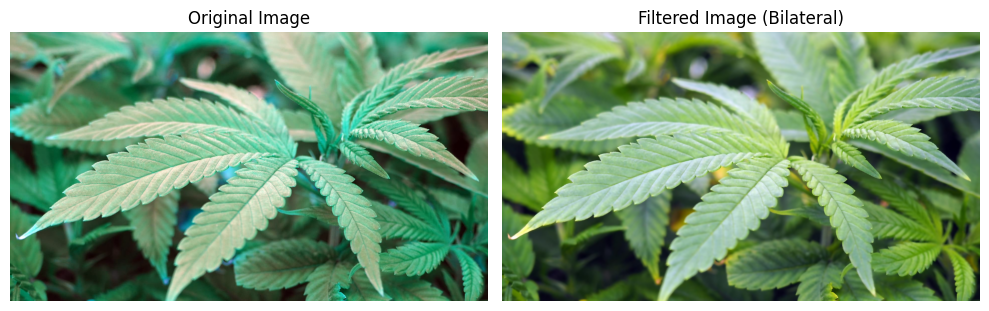

In [ ]:
#Preprocessing Techniques (Bilateral Filtering)
# Noise Reduuction using Bilateral Filtering

import cv2
import numpy as np  # Import NumPy
from matplotlib import pyplot as plt

# Read the uploaded image
image = cv2.imread(uploaded_filename)

# Apply bilateral filtering for noise reduction
# d controls the diameter of each pixel's neighborhood, and sigmaColor and sigmaSpace control the standard deviation of color and spatial distances, respectively.
filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# enhanced_image = cv2.imread('Day1A.jpg_0_4148.jpg')
# Convert BGR to RGB (OpenCV uses BGR format)
enhanced_image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

# Display the original and filtered images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
filtered_image_rgb = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)
plt.imshow(filtered_image_rgb)
plt.title('Filtered Image (Bilateral)')
plt.axis('off')

plt.tight_layout()
plt.show()


Feature Extraction:
Texture Extraction Using Local Binary Pattern (LBP)

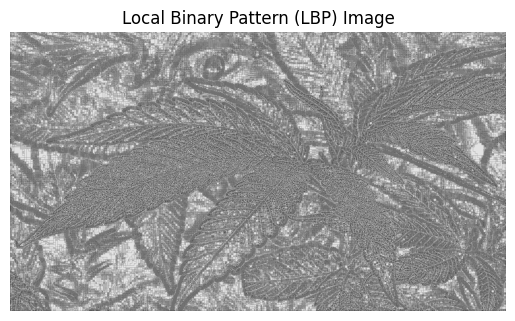

In [ ]:

# LBP is a texture descriptor that calculates a binary pattern at each pixel by comparing it with its neighboring pixels. It's useful for capturing the local texture information.
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from matplotlib import pyplot as plt

# Read the uploaded image
image = cv2.imread(uploaded_filename, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

# Calculate LBP image
radius = 1
n_points = 8 * radius
lbp_image = local_binary_pattern(image, n_points, radius, method='uniform')

# Display the LBP image
plt.imshow(lbp_image, cmap='gray')
plt.title('Local Binary Pattern (LBP) Image')
plt.axis('off')
plt.show()


Feature Extraction: Texture Extraction using Gray Level Co-occurence Matrix(GLCM)

In [ ]:
# Feature Extraction
# Texture Extraction using Gray Level Co-occurence Matrix(GLCM)
# GLCM captures the spatial relationship between pairs of pixel values. It's useful for capturing the texture information based on the frequency of pixel pairs with specific values and distances.

import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from matplotlib import pyplot as plt

# Read the uploaded image
image = cv2.imread(uploaded_filename, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale

# Calculate GLCM
distances = [1]  # List of distances for which GLCM is calculated
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # List of angles for which GLCM is calculated
glcm = greycomatrix(image, distances=distances, angles=angles, symmetric=True, normed=True)

# Calculate GLCM properties
contrast = greycoprops(glcm, prop='contrast')
dissimilarity = greycoprops(glcm, prop='dissimilarity')
homogeneity = greycoprops(glcm, prop='homogeneity')

print("GLCM Contrast:", contrast)
print("GLCM Dissimilarity:", dissimilarity)
print("GLCM Homogeneity:", homogeneity)




GLCM Contrast: [[18.92964266 42.38280386 28.66317509 43.93077145]]
GLCM Dissimilarity: [[2.10451522 3.32258319 2.62857547 3.36079926]]
GLCM Homogeneity: [[0.52000988 0.39873111 0.4708945  0.38994455]]


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


GLCM Contrast:

Values:[[132.15399492 263.17190881 133.48393163 259.53266493]]
Interpretation: The values for each direction (angle) lies between 0 degrees to 45 degrees.
*(Higher contrast values generally suggest that there are significant variations in pixel intensity values in those directions.)

GLCM Dissimilarity:

Values: [[1.72353535 2.69152615 1.59754159 2.5562134 ]]
Interpretation:There is minimal difference in the readings obtained in GLCM Dissimilarity.
*(Higher dissimilarity values imply that neighboring pixels have quite different intensity values.)

GLCM Homogeneity:

Values: [[0.69998099 0.63932635 0.71394603 0.64556668]]
Interpretation:Minimal variation in pixel values denote more uniformity.

*( Homogeneity measures how uniform the pixel intensity values are in a local region.)

Segmentation Techniques: Otsu Segmentation

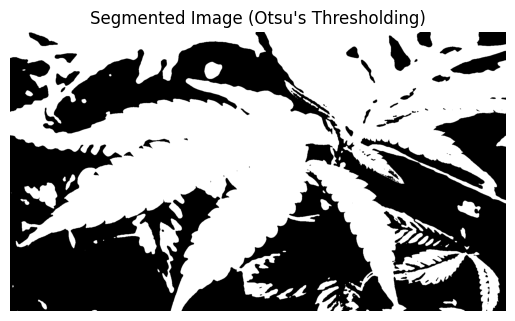

In [ ]:

# Otsu Segmentation
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the uploaded image
image = cv2.imread(uploaded_filename)

# Apply bilateral filtering for noise reduction
filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Convert the filtered image to grayscale
gray_image = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to segment the image
_, segmented_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the segmented image
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmented Image (Otsu's Thresholding)")
plt.axis('off')
plt.show()


Sobel Edge Detection & Deviation Values(R,G,B)

Mean RGB values:
Red: 111.27747380001158
Green: 143.88438133287013
Blue: 94.68019898481076

Standard Deviation RGB values:
Red: 55.15076708234103
Green: 59.14068047670955
Blue: 60.28633766072703


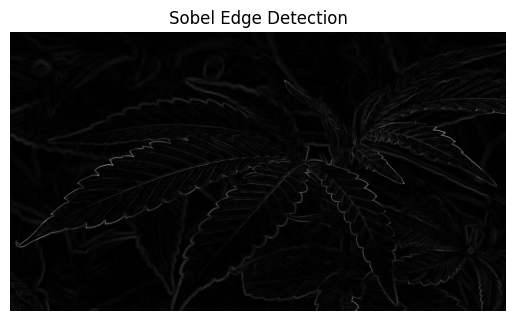

In [ ]:


import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the uploaded image
image = cv2.imread(uploaded_filename)

# Apply bilateral filtering for noise reduction
filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Convert the filtered image to grayscale
gray_image = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2GRAY)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize the Sobel edges for display
sobel_edges_normalized = cv2.normalize(sobel_edges, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Calculate mean and standard deviation of RGB channels
mean_red = np.mean(image[:,:,2])
mean_green = np.mean(image[:,:,1])
mean_blue = np.mean(image[:,:,0])

std_red = np.std(image[:,:,2])
std_green = np.std(image[:,:,1])
std_blue = np.std(image[:,:,0])

# Print color features
print("Mean RGB values:")
print("Red:", mean_red)
print("Green:", mean_green)
print("Blue:", mean_blue)

print("\nStandard Deviation RGB values:")
print("Red:", std_red)
print("Green:", std_green)
print("Blue:", std_blue)

# Display the Sobel edges
plt.imshow(sobel_edges_normalized, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')
plt.show()


In [ ]:
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import cv2
import numpy as np

# Read the uploaded image
image = cv2.imread(uploaded_filename)

# Apply bilateral filtering for noise reduction
filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

# Convert the filtered image to grayscale
gray_image = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2GRAY)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

# Load your dataset and labels (X and y)
# X = [sobel_edges.flatten()]  # Input features
# y = [label]  # Corresponding labels (quality class)

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLP classifier
# classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

# Train the classifier
# classifier.fit(X_train, y_train)

# Make predictions
# y_pred = classifier.predict(X_test)

# Evaluate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
